<a href="https://colab.research.google.com/github/perrijuan/UFRJ-Analytica-processo-seletivo/blob/galho3/algortihm_performace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from google.colab import files

class DataCleaner:
    def __init__(self, numeric_strategy: str = "median", remove_outliers: bool = True, outlier_threshold: float = 3.0):
        self.numeric_strategy = numeric_strategy
        self.remove_outliers = remove_outliers
        self.outlier_threshold = outlier_threshold

    def clean(self, df: pd.DataFrame) -> pd.DataFrame:
        df = df.copy()
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        for col in numeric_cols:
            if df[col].isnull().sum() > 0:
                if self.numeric_strategy == "mean":
                    df[col] = df[col].fillna(df[col].mean())
                else:
                    df[col] = df[col].fillna(df[col].median())

        categorical_cols = df.select_dtypes(include=["object", "category"]).columns
        for col in categorical_cols:
            if df[col].isnull().sum() > 0:
                df[col] = df[col].fillna(df[col].mode()[0])

        df.drop_duplicates(inplace=True)

        if self.remove_outliers and len(numeric_cols) > 0:
            numeric_data = df[numeric_cols]
            z_scores = stats.zscore(numeric_data)
            mask = (np.abs(z_scores) < self.outlier_threshold).all(axis=1)
            df = df[mask]

        return df

# Exemplo de uso com CSV no Colab
if __name__ == "__main__":
    # Substitua aqui com o caminho do seu arquivo no Drive ou Colab
    caminho = '/content/dataset_limpo (3).csv'  # <- edite este caminho

    # Lê o CSV
    df = pd.read_csv(caminho)
    print("Antes da limpeza:")
    print(df.head())

    # Limpeza
    cleaner = DataCleaner(numeric_strategy="median", remove_outliers=True, outlier_threshold=3.0)
    df_limpo = cleaner.clean(df)

    print("\nDepois da limpeza:")
    print(df_limpo.head())

    # Salvar o DataFrame limpo de volta como CSV
    output_path = '/content/dataset_limpo-lib.csv'  # Caminho de saída no Drive
    df_limpo.to_csv(output_path, index=False)

    # Se você estiver no Colab e quiser baixar diretamente o arquivo limpo:
    files.download(output_path)


FileNotFoundError: [Errno 2] No such file or directory: '/content/dataset_limpo (3).csv'

Welcome to the ML Model Comparison System (CSV input via Google Colab)!
Please upload your CSV file:


KeyboardInterrupt: 

implementaçãoo de algortimo para a previão -> com o melhor algoritmo selecionado

=== Pipeline para Análise de Cartões em Partidas de Futebol ===
Carregue seu dataset com colunas: partida_id, rodata, clube, cartao, atleta, num_camisa, posicao, minuto


Saving dataset_limpo-lib.csv to dataset_limpo-lib (1).csv
Arquivo carregado: dataset_limpo-lib (1).csv
Colunas encontradas no dataset: Index(['partida_id', 'rodata', 'clube', 'cartao', 'atleta', 'num_camisa',
       'posicao', 'minuto'],
      dtype='object')

Primeiras linhas do dataset:
   partida_id  rodata          clube   cartao                      atleta  \
0        4607       1    Figueirense  Amarelo      Paulo Roberto da Silva   
1        4607       1    Figueirense  Amarelo               Thiago Heleno   
2        4608       1  Internacional  Amarelo         Andrés D'Alessandro   
3        4608       1        Vitoria  Amarelo  Marcelo Machado dos Santos   
4        4608       1        Vitoria  Amarelo                      Mansur   

   num_camisa     posicao minuto  
0        28.0  Meio-campo     66  
1         4.0    Zagueiro     44  
2        10.0  Meio-campo     72  
3        29.0  Meio-campo     86  
4        14.0    Zagueiro     10  

=== Explorando dados de cartões ===


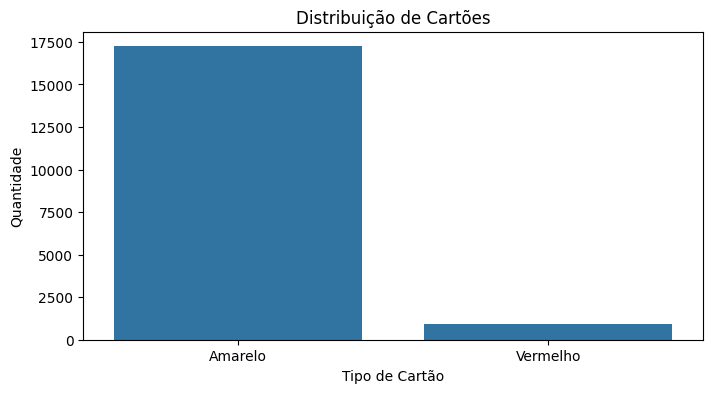


Cartões por posição:
cartao      Amarelo  Vermelho
posicao                      
Atacante       2151       113
Goleiro         540        26
Meio-campo     8260       394
Zagueira         22         0
Zagueiro       6262       379


<Figure size 1000x600 with 0 Axes>

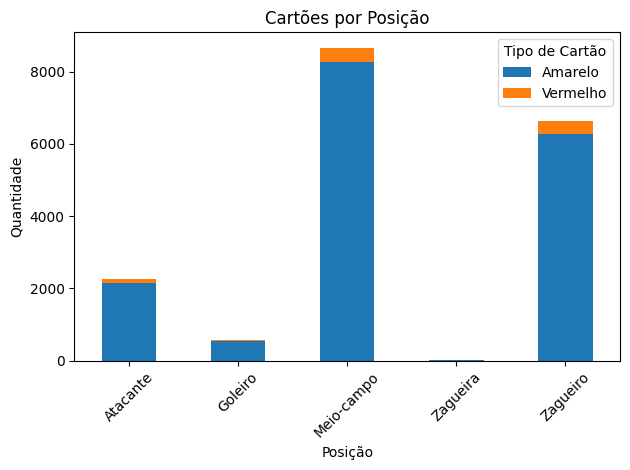


=== Preparação de dados para modelagem ===
Codificação para clube: {'America-MG': np.int64(0), 'Athletico-PR': np.int64(1), 'Atletico-GO': np.int64(2), 'Atletico-MG': np.int64(3), 'Avai': np.int64(4), 'Bahia': np.int64(5), 'Botafogo-RJ': np.int64(6), 'Bragantino': np.int64(7), 'CSA': np.int64(8), 'Ceara': np.int64(9), 'Chapecoense': np.int64(10), 'Corinthians': np.int64(11), 'Coritiba': np.int64(12), 'Criciuma': np.int64(13), 'Cruzeiro': np.int64(14), 'Cuiaba': np.int64(15), 'Figueirense': np.int64(16), 'Flamengo': np.int64(17), 'Fluminense': np.int64(18), 'Fortaleza': np.int64(19), 'Goias': np.int64(20), 'Gremio': np.int64(21), 'Internacional': np.int64(22), 'Joinville': np.int64(23), 'Juventude': np.int64(24), 'Palmeiras': np.int64(25), 'Parana': np.int64(26), 'Ponte Preta': np.int64(27), 'Santa Cruz': np.int64(28), 'Santos': np.int64(29), 'Sao Paulo': np.int64(30), 'Sport': np.int64(31), 'Vasco': np.int64(32), 'Vitoria': np.int64(33)}
Codificação para cartao: {'Amarelo': np.int64(0

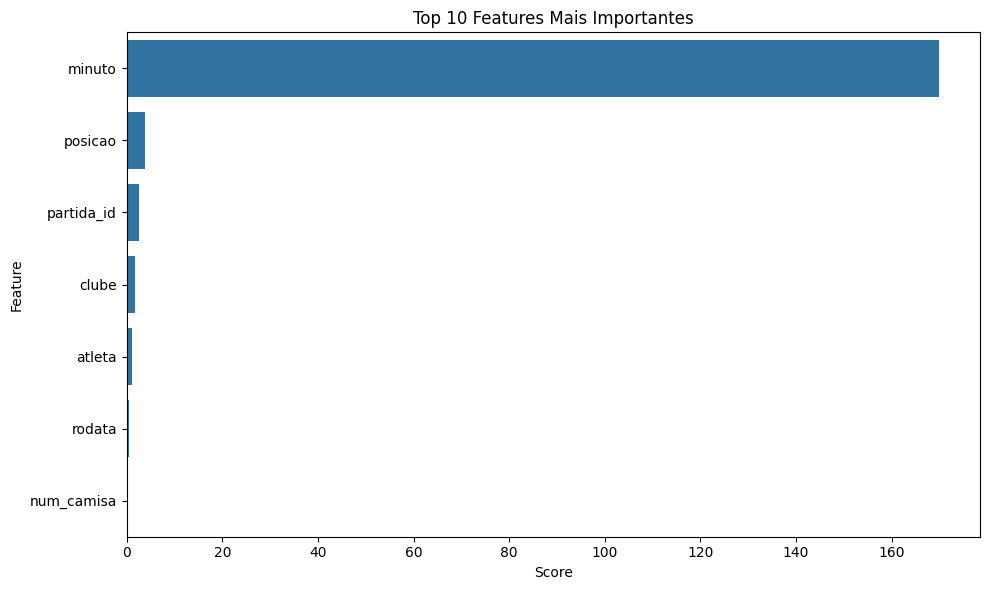


Usando as top 7 features para modelagem

=== Treinamento e avaliação de modelos ===

Treinando Regressão Logística...
Acurácia: 0.9497
F1 Score: 0.9252


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


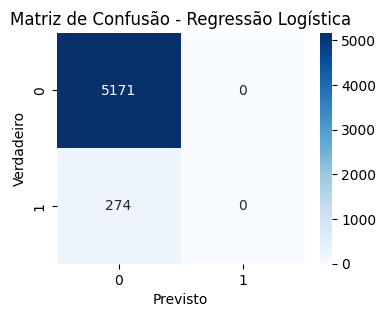


Treinando Árvore de Decisão...
Acurácia: 0.9480
F1 Score: 0.9247


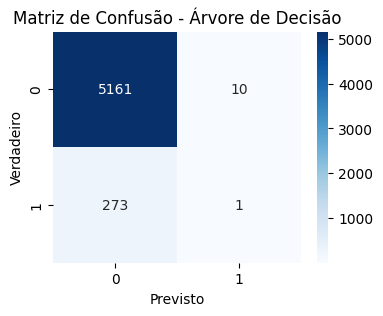

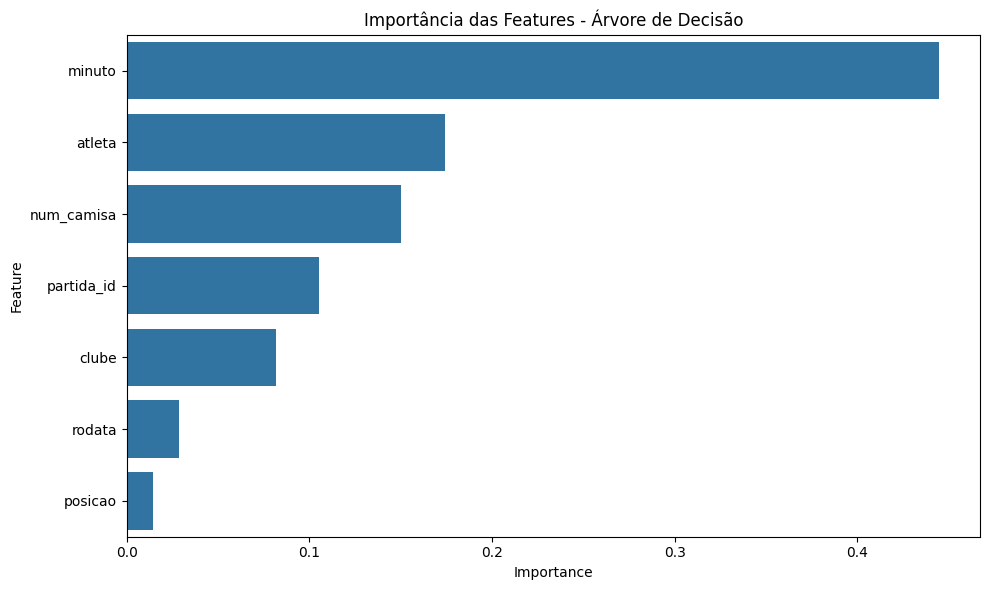


Treinando KNN...
Acurácia: 0.9489
F1 Score: 0.9255


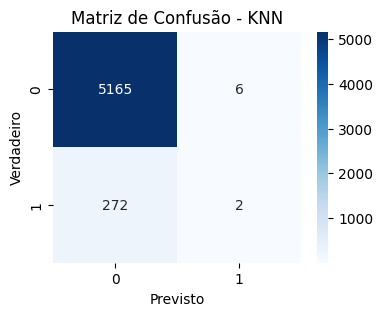


Treinando Naive Bayes (Gaussian)...
Acurácia: 0.9497
F1 Score: 0.9252


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


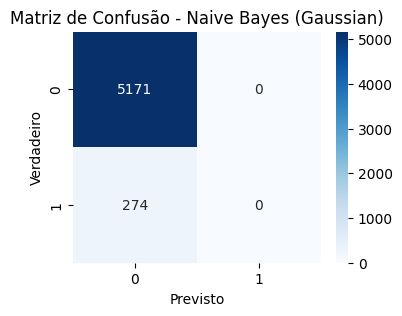


Treinando SVM...
Acurácia: 0.9497
F1 Score: 0.9252


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


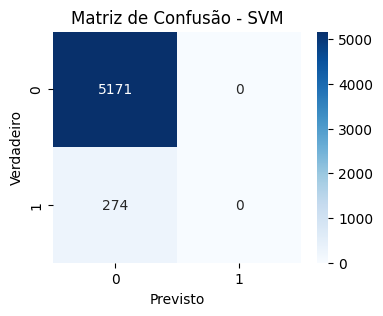


Treinando Rede Neural (MLP)...
Acurácia: 0.9482
F1 Score: 0.9261


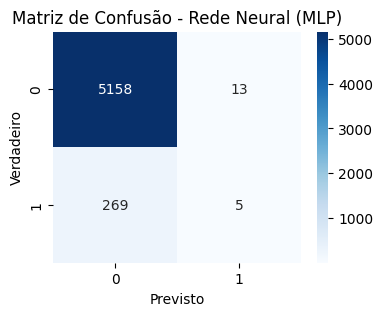


Treinando Random Forest...
Acurácia: 0.9473
F1 Score: 0.9250


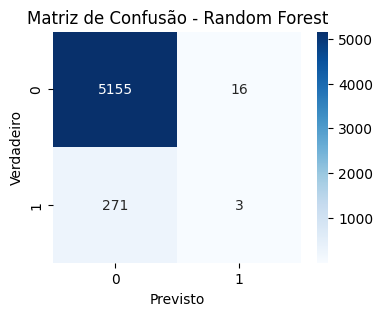

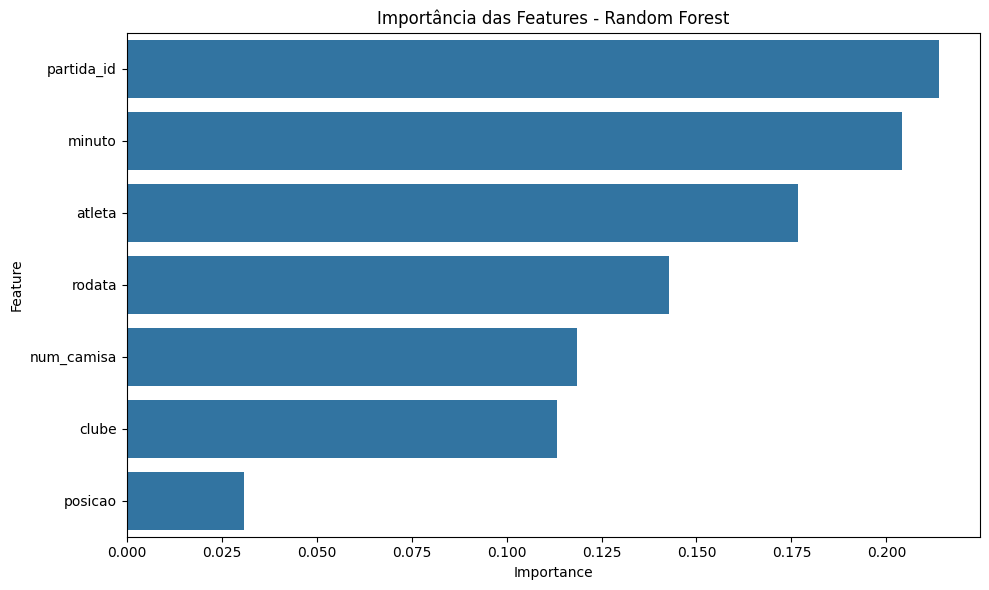


Treinando Gradient Boosting...
Acurácia: 0.9499
F1 Score: 0.9256


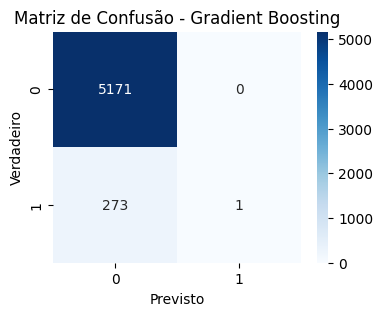

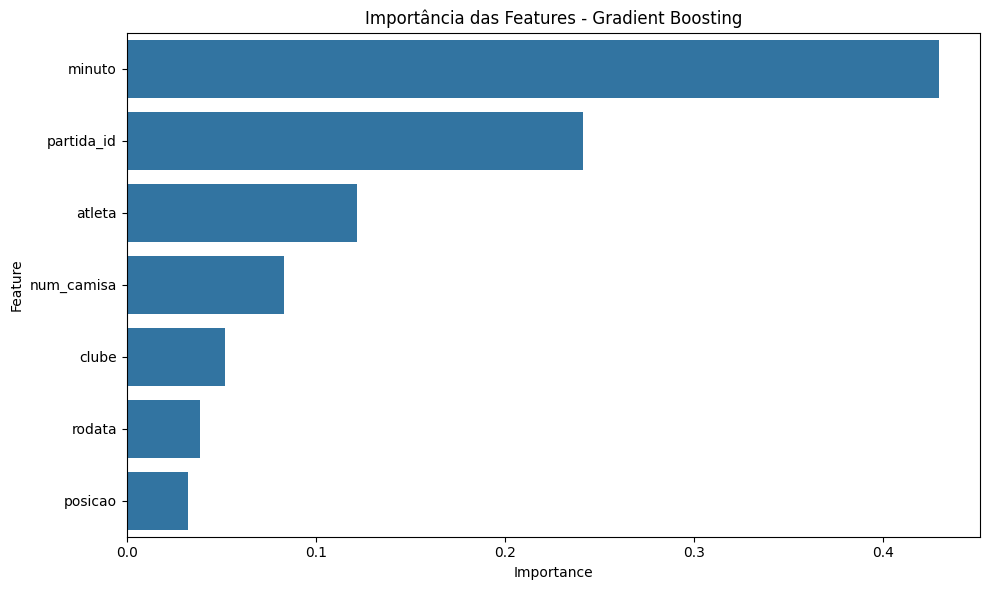


Treinando XGBoost...
Acurácia: 0.9460
F1 Score: 0.9253


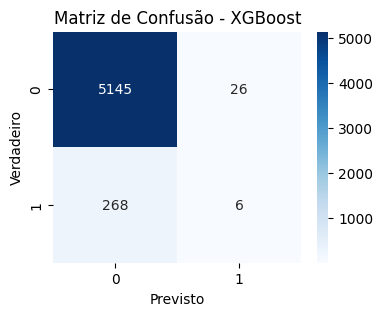

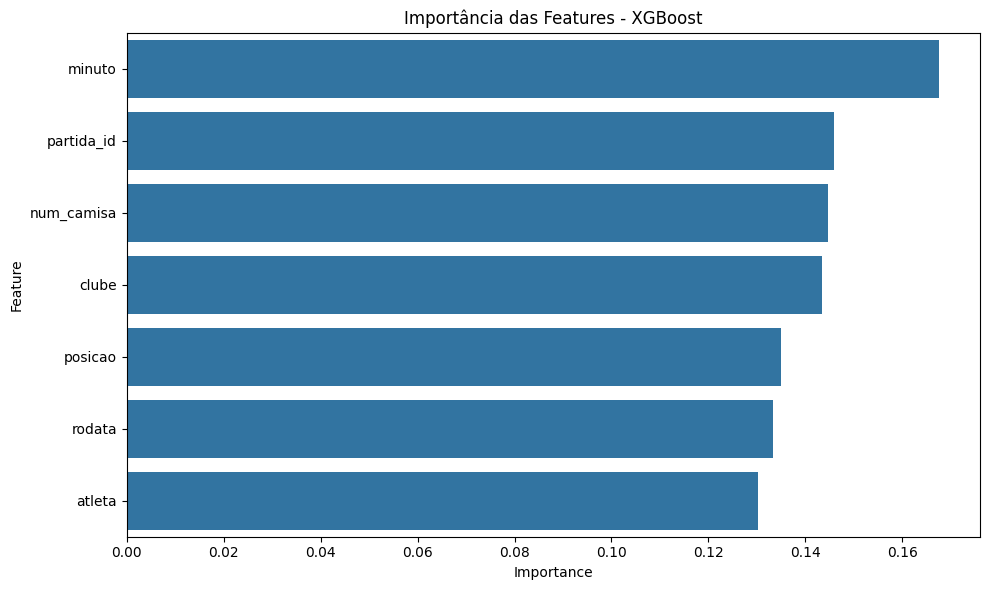


=== Comparação dos Modelos ===
                   Modelo  Acurácia  F1 Score  Precisão    Recall
0     Regressão Logística  0.949679  0.925167  0.901889  0.949679
1       Árvore de Decisão  0.948026  0.924689  0.906542  0.948026
2                     KNN  0.948944  0.925505  0.914749  0.948944
3  Naive Bayes (Gaussian)  0.949679  0.925167  0.901889  0.949679
4                     SVM  0.949679  0.925167  0.901889  0.949679
5       Rede Neural (MLP)  0.948209  0.926132  0.916584  0.948209
6           Random Forest  0.947291  0.924989  0.910193  0.947291
7       Gradient Boosting  0.949862  0.925620  0.952377  0.949862
8                 XGBoost  0.946006  0.925272  0.912095  0.946006


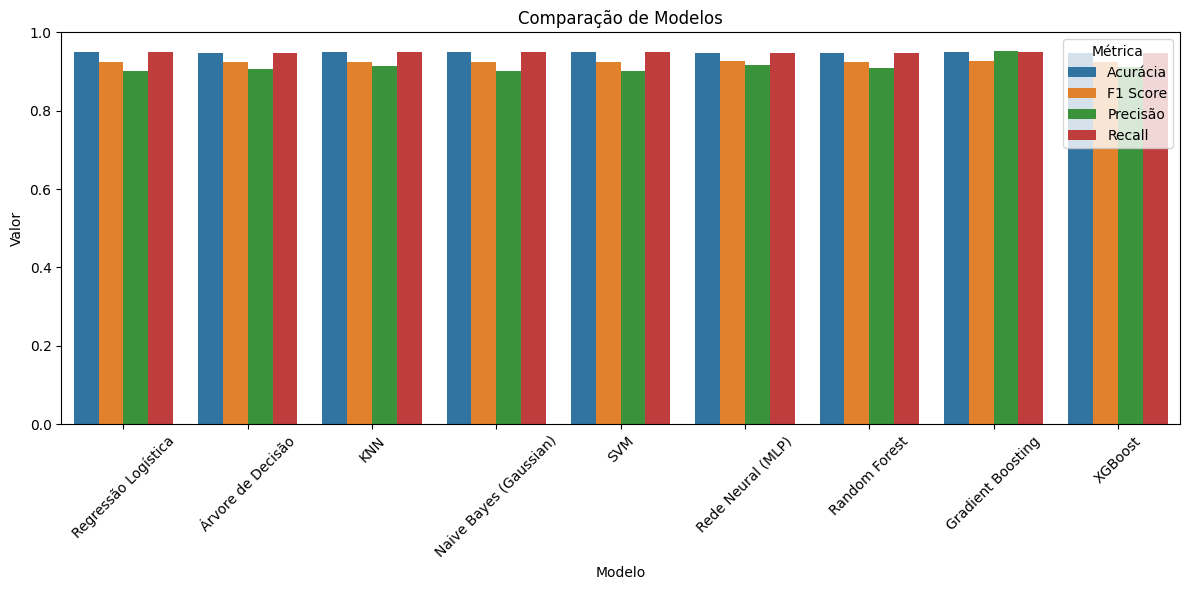



=== Pipeline com Dataset Aleatório (Exemplo) ===

== Avaliando modelos em dataset aleatório ==
===== Regressão Logística =====
Acurácia: 0.8833


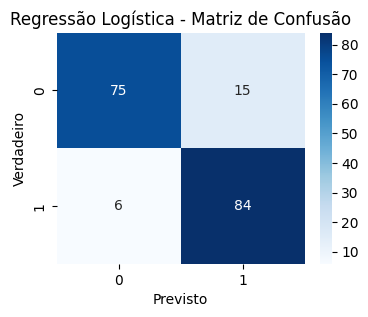

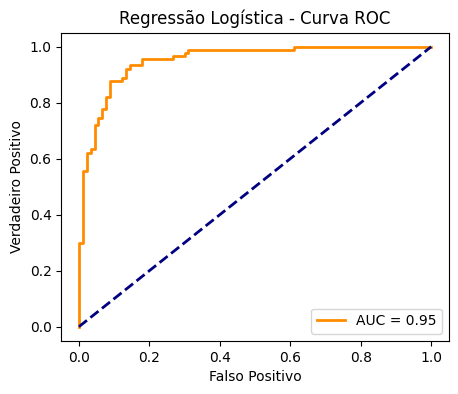

===== Árvore de Decisão =====
Acurácia: 0.8722


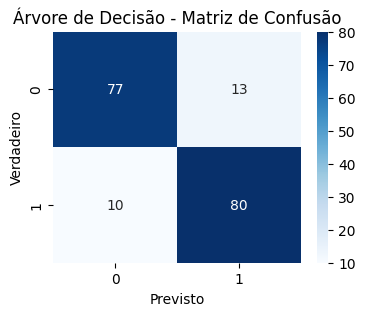

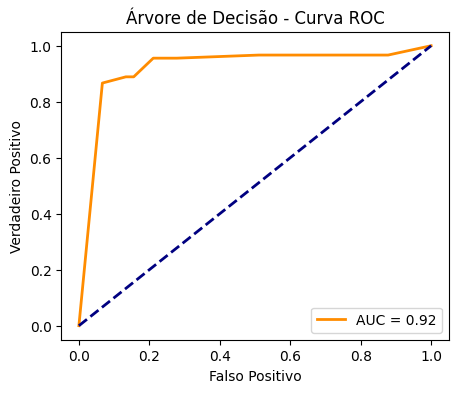

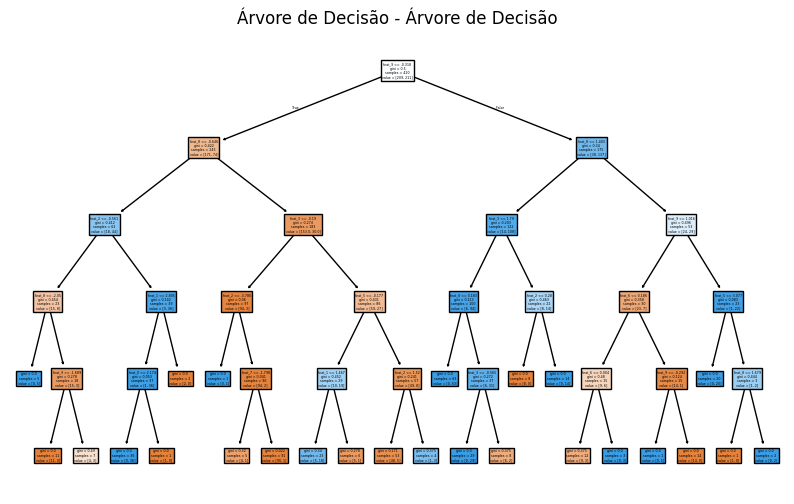

===== KNN =====
Acurácia: 0.9000


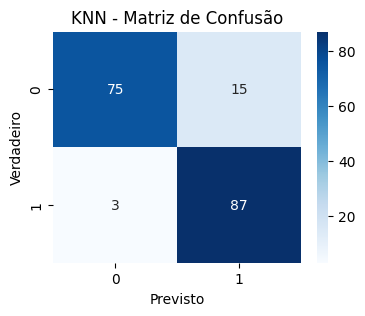

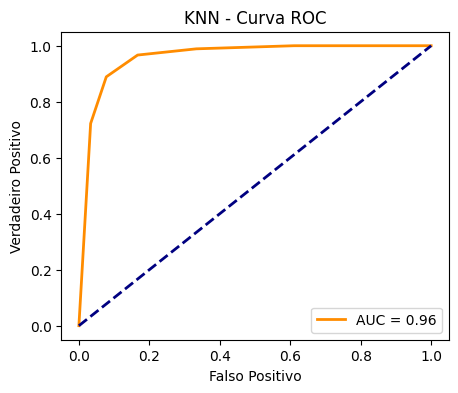

===== Naive Bayes (Gaussian) =====
Acurácia: 0.8833


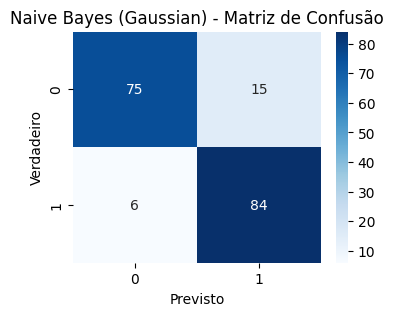

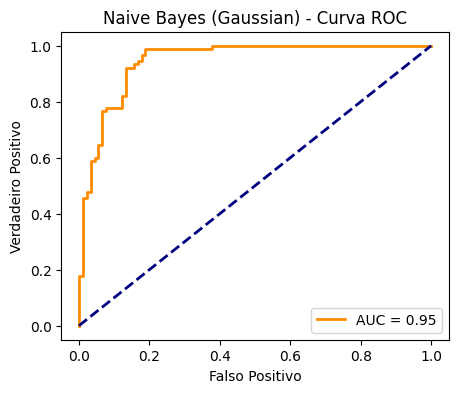

===== SVM =====
Acurácia: 0.9333


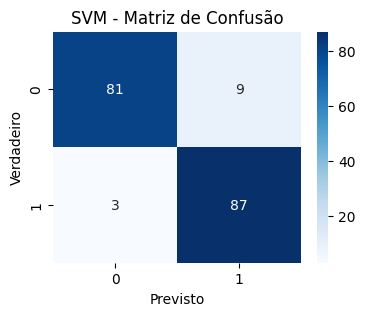

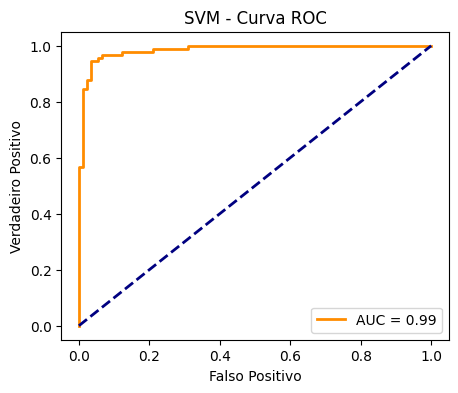

===== Rede Neural (MLP) =====
Acurácia: 0.8944


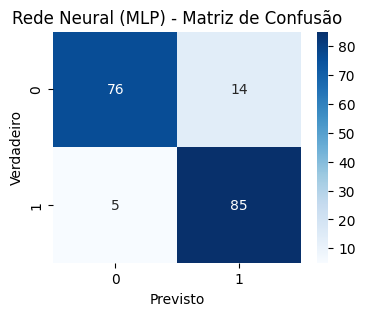

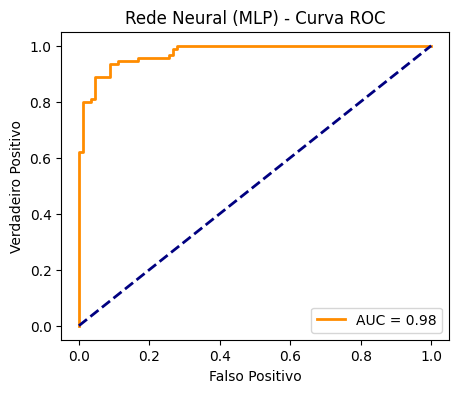

===== Random Forest =====
Acurácia: 0.9444


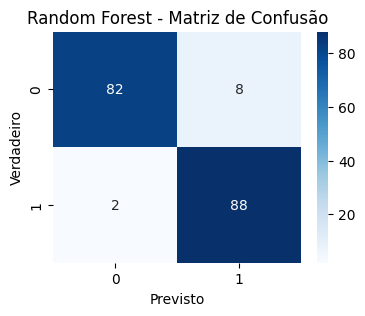

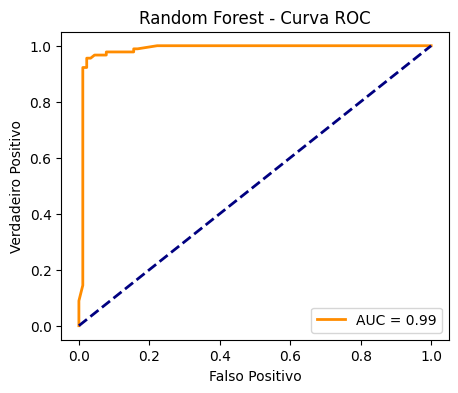

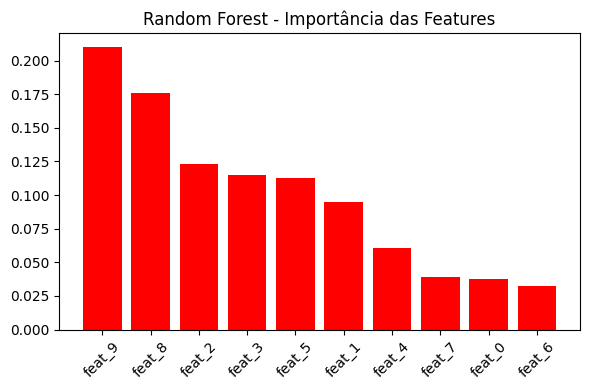

===== Gradient Boosting =====
Acurácia: 0.9444


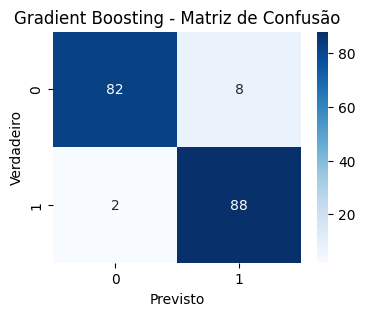

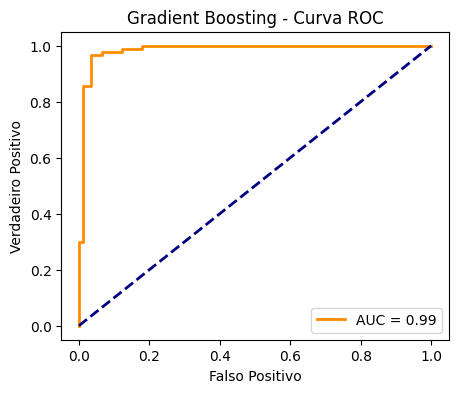

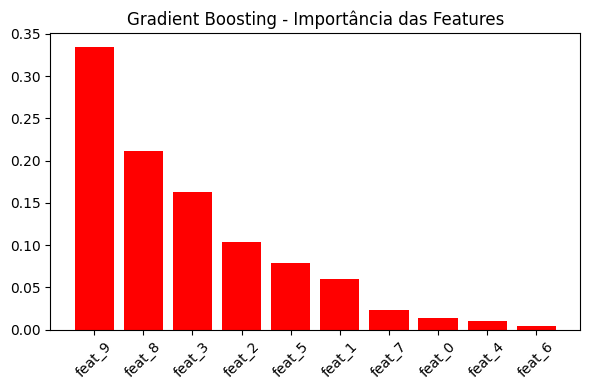

===== XGBoost =====
Acurácia: 0.9167


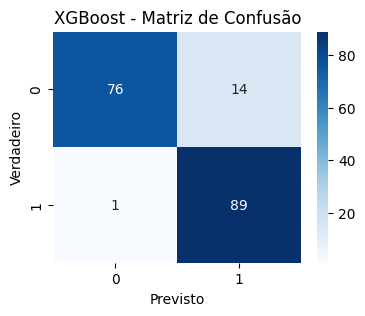

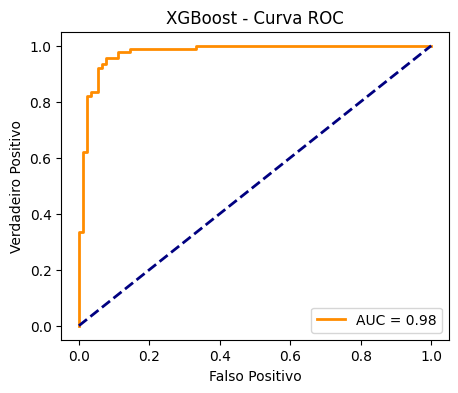

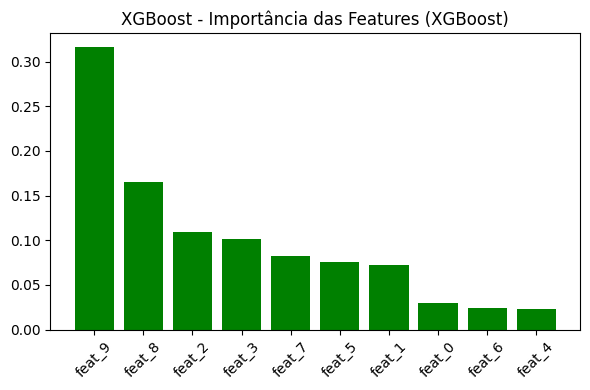


Melhor modelo no dataset aleatório: Random Forest com acurácia de 0.9444


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from dataclasses import dataclass
from google.colab import files

# Se quiser utilizar XGBoost, instale e importe caso disponível.
try:
    from xgboost import XGBClassifier
    xgboost_available = True
except ImportError:
    xgboost_available = False

def read_my_dataset(csv_path: str) -> pd.DataFrame:
    """
    Lê um arquivo CSV contendo colunas:
    partida_id, rodata, clube, cartao, atleta, num_camisa, posicao, minuto.

    Retorna um DataFrame do pandas com essas colunas.
    """
    data = pd.read_csv(csv_path)
    print("Colunas encontradas no dataset:", data.columns)

    # Exemplo de acesso às colunas
    print("\nPrimeiras linhas do dataset:")
    print(data.head())

    return data

@dataclass
class Model:
    nome: str
    estimator: object

def get_models():
    """
    Retorna uma lista de modelos com configurações padrão.
    """
    models = []
    models.append(Model("Regressão Logística",
                        LogisticRegression(max_iter=1000, random_state=42)))
    models.append(Model("Árvore de Decisão",
                        DecisionTreeClassifier(max_depth=5, random_state=42)))
    models.append(Model("KNN",
                        KNeighborsClassifier(n_neighbors=5)))
    models.append(Model("Naive Bayes (Gaussian)",
                        GaussianNB()))
    models.append(Model("SVM",
                        SVC(probability=True, random_state=42)))
    models.append(Model("Rede Neural (MLP)",
                        MLPClassifier(hidden_layer_sizes=(100, 50),
                                      max_iter=1000,
                                      random_state=42)))
    models.append(Model("Random Forest",
                        RandomForestClassifier(n_estimators=100, random_state=42)))
    models.append(Model("Gradient Boosting",
                        GradientBoostingClassifier(n_estimators=100, random_state=42)))
    if xgboost_available:
        models.append(Model("XGBoost",
                            XGBClassifier(n_estimators=100, random_state=42)))
    return models

def plot_confusion_matrix(y_true, y_pred, title="Matriz de Confusão"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.title(title)
    plt.xlabel("Previsto")
    plt.ylabel("Verdadeiro")
    plt.show()

def plot_roc_curve(y_true, y_scores, title="Curva ROC"):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel("Falso Positivo")
    plt.ylabel("Verdadeiro Positivo")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

def pipeline_cartoes():
    """
    Pipeline para análise e predição de cartões em partidas de futebol
    usando o dataset com colunas: partida_id, rodata, clube, cartao, atleta,
    num_camisa, posicao, minuto.
    """
    # ----------------------------------------------------------------
    # Passo 1: Carregar os dados
    # ----------------------------------------------------------------
    try:
        uploaded = files.upload()
        dataset_path = list(uploaded.keys())[0]
        print(f"Arquivo carregado: {dataset_path}")
    except:
        print("Erro ao carregar arquivo. Usando caminho fixo.")
        dataset_path = "seu_dataset.csv"  # Substitua pelo caminho correto

    data = read_my_dataset(dataset_path)

    # ----------------------------------------------------------------
    # Passo 2: Limpeza e Exploração de Dados
    # ----------------------------------------------------------------
    print("\n=== Explorando dados de cartões ===")

    # Verificar valores nulos
    print("\nValores nulos por coluna:")
    print(data.isnull().sum())

    # Remover duplicatas
    data_cleaned = data.drop_duplicates()
    print(f"\nLinhas após remover duplicatas: {data_cleaned.shape[0]} (original: {data.shape[0]})")

    # Preencher valores nulos se necessário
    for col in data_cleaned.columns:
        if data_cleaned[col].isnull().sum() > 0:
            if data_cleaned[col].dtype in ['float64', 'int64']:
                data_cleaned[col].fillna(data_cleaned[col].mean(), inplace=True)
            else:
                data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)

    # Análise básica dos cartões
    if 'cartao' in data_cleaned.columns:
        print("\nDistribuição de cartões:")
        cartoes_count = data_cleaned['cartao'].value_counts()
        print(cartoes_count)

        plt.figure(figsize=(8, 4))
        sns.countplot(x='cartao', data=data_cleaned)
        plt.title('Distribuição de Cartões')
        plt.xlabel('Tipo de Cartão')
        plt.ylabel('Quantidade')
        plt.show()

    # Análise por posição (se disponível)
    if 'posicao' in data_cleaned.columns:
        print("\nCartões por posição:")
        cartoes_posicao = pd.crosstab(data_cleaned['posicao'], data_cleaned['cartao'])
        print(cartoes_posicao)

        plt.figure(figsize=(10, 6))
        cartoes_posicao.plot(kind='bar', stacked=True)
        plt.title('Cartões por Posição')
        plt.xlabel('Posição')
        plt.ylabel('Quantidade')
        plt.legend(title='Tipo de Cartão')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # ----------------------------------------------------------------
    # Passo 3: Preparação de Features para Modelagem
    # ----------------------------------------------------------------
    print("\n=== Preparação de dados para modelagem ===")

    # Codificar variáveis categóricas
    data_encoded = data_cleaned.copy()
    categorical_columns = data_cleaned.select_dtypes(include=['object']).columns

    label_encoders = {}
    for col in categorical_columns:
        le = LabelEncoder()
        data_encoded[col] = le.fit_transform(data_cleaned[col].astype(str))
        label_encoders[col] = le
        print(f"Codificação para {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

    # Definir variável alvo (neste caso vamos prever o tipo de cartão)
    if 'cartao' in data_encoded.columns:
        target = 'cartao'
        print(f"\nPrevisão da variável alvo: {target}")
        X = data_encoded.drop(columns=[target])
        y = data_encoded[target]

        # Dividir em treino e teste
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, stratify=y, random_state=42
        )

        print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
        print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")

        # Normalizar as features numéricas
        numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
        if len(numeric_cols) > 0:
            scaler = MinMaxScaler()
            X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
            X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

        # ----------------------------------------------------------------
        # Passo 4: Seleção de Features
        # ----------------------------------------------------------------
        print("\n=== Seleção de features importantes ===")
        selector = SelectKBest(score_func=f_classif, k='all')
        selector.fit(X_train, y_train)

        # Obter scores de importância
        feature_scores = pd.DataFrame({
            'Feature': X.columns,
            'Score': selector.scores_
        })
        feature_scores = feature_scores.sort_values('Score', ascending=False)
        print("\nImportância das features:")
        print(feature_scores.head(10))  # Top 10 features

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Score', y='Feature', data=feature_scores.head(10))
        plt.title('Top 10 Features Mais Importantes')
        plt.tight_layout()
        plt.show()

        # Selecionar as top features (opcional)
        k_best = min(10, len(X.columns))  # Limitar a 10 ou menos
        top_features = feature_scores['Feature'].head(k_best).values
        X_train_selected = X_train[top_features]
        X_test_selected = X_test[top_features]

        print(f"\nUsando as top {k_best} features para modelagem")

        # ----------------------------------------------------------------
        # Passo 5: Treinamento e Avaliação de Modelos
        # ----------------------------------------------------------------
        print("\n=== Treinamento e avaliação de modelos ===")
        models = get_models()
        results = []

        for model in models:
            print(f"\nTreinando {model.nome}...")
            clf = model.estimator
            clf.fit(X_train_selected, y_train)
            y_pred = clf.predict(X_test_selected)

            acc = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')

            results.append({
                'Modelo': model.nome,
                'Acurácia': acc,
                'F1 Score': f1,
                'Precisão': precision,
                'Recall': recall
            })

            print(f"Acurácia: {acc:.4f}")
            print(f"F1 Score: {f1:.4f}")

            # Matriz de confusão
            plot_confusion_matrix(y_test, y_pred, title=f"Matriz de Confusão - {model.nome}")

            # Importância das features (para modelos que suportam)
            if hasattr(clf, 'feature_importances_'):
                importances = pd.DataFrame({
                    'Feature': top_features,
                    'Importance': clf.feature_importances_
                }).sort_values('Importance', ascending=False)

                plt.figure(figsize=(10, 6))
                sns.barplot(x='Importance', y='Feature', data=importances)
                plt.title(f'Importância das Features - {model.nome}')
                plt.tight_layout()
                plt.show()

        # Comparação dos modelos
        results_df = pd.DataFrame(results)
        print("\n=== Comparação dos Modelos ===")
        print(results_df)

        plt.figure(figsize=(12, 6))
        results_df_melted = pd.melt(results_df,
                                   id_vars=['Modelo'],
                                   value_vars=['Acurácia', 'F1 Score', 'Precisão', 'Recall'],
                                   var_name='Métrica', value_name='Valor')
        sns.barplot(x='Modelo', y='Valor', hue='Métrica', data=results_df_melted)
        plt.title('Comparação de Modelos')
        plt.xticks(rotation=45)
        plt.ylim(0, 1)
        plt.tight_layout()
        plt.show()
    else:
        print("A coluna 'cartao' não foi encontrada no dataset.")

def pipeline_exemplo_dataset_aleatorio():
    """
    Exemplo de pipeline que gera um dataset artificial, aplica vários classificadores
    e exibe métricas de desempenho.
    """
    from sklearn.datasets import make_classification
    X, y = make_classification(
        n_samples=600,
        n_features=10,
        n_informative=5,
        n_classes=2,
        random_state=42
    )

    # Divide em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.3,
        stratify=y,
        random_state=42
    )

    # Busca modelos pré-configurados
    models = get_models()

    print("\n== Avaliando modelos em dataset aleatório ==")
    melhor_modelo = None
    melhor_acc = 0.0

    for model in models:
        clf = model.estimator
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        if acc > melhor_acc:
            melhor_acc = acc
            melhor_modelo = model.nome

        print(f"===== {model.nome} =====")
        print(f"Acurácia: {acc:.4f}")
        plot_confusion_matrix(y_test, y_pred, title=f"{model.nome} - Matriz de Confusão")

        # Plot da Curva ROC (para binário)
        if hasattr(clf, "predict_proba"):
            y_prob = clf.predict_proba(X_test)[:, 1]
            plot_roc_curve(y_test, y_prob, title=f"{model.nome} - Curva ROC")

        # Exemplo de visualização da árvore
        if isinstance(clf, DecisionTreeClassifier):
            plt.figure(figsize=(10, 6))
            plot_tree(clf, filled=True, feature_names=[f"feat_{i}" for i in range(X.shape[1])])
            plt.title(f"{model.nome} - Árvore de Decisão")
            plt.show()

        # Importância de features (RandomForest, GradientBoosting, XGBoost)
        if isinstance(clf, (RandomForestClassifier, GradientBoostingClassifier)):
            importances = clf.feature_importances_
            indices = np.argsort(importances)[::-1]
            plt.figure(figsize=(6, 4))
            plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
            plt.xticks(range(X.shape[1]), [f"feat_{i}" for i in indices], rotation=45)
            plt.title(f"{model.nome} - Importância das Features")
            plt.tight_layout()
            plt.show()

        if xgboost_available and isinstance(clf, XGBClassifier):
            importances = clf.feature_importances_
            indices = np.argsort(importances)[::-1]
            plt.figure(figsize=(6, 4))
            plt.bar(range(X.shape[1]), importances[indices], color="g", align="center")
            plt.xticks(range(X.shape[1]), [f"feat_{i}" for i in indices], rotation=45)
            plt.title(f"{model.nome} - Importância das Features (XGBoost)")
            plt.tight_layout()
            plt.show()

    print(f"\nMelhor modelo no dataset aleatório: {melhor_modelo} com acurácia de {melhor_acc:.4f}")

if __name__ == "__main__":
    print("=== Pipeline para Análise de Cartões em Partidas de Futebol ===")
    print("Carregue seu dataset com colunas: partida_id, rodata, clube, cartao, atleta, num_camisa, posicao, minuto")
    pipeline_cartoes()

    print("\n=================================\n")
    print("=== Pipeline com Dataset Aleatório (Exemplo) ===")
    pipeline_exemplo_dataset_aleatorio()